### **Course**: BIO-341 [_Dynamical systems in biology_](https://moodle.epfl.ch/course/info.php?id=14291)

**Professor**: _Julian Shillcock_ & _Felix Naef_

SSV, BA5, 2023


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

/var/folders/vq/knfnd3fs6x19mn5xcw685flr0000gq/T/ipykernel_10015/1896525300.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# Biochemical circuits based on reciprocal feedback

The goal is to study two different genetic network architectures that are related to the one described in “Construction of a genetic toggle switch in E.Coli” (Gardner, Cantor and Collins et al.  Nature, 2000). This paper discusses a model based on reciprocal negative feedback inhibition. Here, we first ask you to consider
positive feedbacks and then a combination of both positive and negative feedbacks.

## A genetic toggle switch based on reciprocal positive feedback

**1) Read the paper “Construction of a genetic toggle switch in E. Coli” on moodle (“Nature2000.pdf”).**

**2) Describe the meaning of each interaction, represented as arrows in Figure 1 in the paper.**

> 2) The arrows from the genes (Repressor 1 and 2) to the corresponding promoters denote transcriptional repression. Inducers 1 and 2 inhibit the repression, thus promote the expression of the repressors

Now let's look at the equations: 

$$ \binom{\dot{u}}{\dot{v}}= \binom{\frac{\alpha_{1}}{1+v^{\beta}} -u}{  \frac{\alpha_{2}}{1+u^{\gamma}} -v} \,\, \quad(Model\,\, 1) $$

**3) What are the degradation rates for $u$ and $v$ ?**

> 3) The relative degradation rates are 1 for both, since there are no constants in front of the minus signs.

**4) What is the meaning of the parameters $\beta$ and  $\gamma$?**

> 4) These are the cooperativity coefficients. They are directly linked to the number of binding sites for the proteins on the promoters.

**5) Where do the terms $\frac{1}{1+v^{\beta}}$ and $\frac{1}{1+u^{\gamma}}$ come from? What is the meaning of the “$1+$” in the denominator?**

>5) The terms $\frac{1}{1+v^{\beta}}$ and $\frac{1}{1+u^{\gamma}}$ indicate that the production rate is proportional to the **unoccupied** fraction of the promoter, since an occupied promoter would mean repression. The “$1+$” is related to the binding constant describing the association between proteins and DNA. From notation of Chapter 2, $K = \frac{k_{-1}}{k_{1}} = 1$ here.

**6) Write a model (Model 2) representing a pair of reciprocal
		*activators*. Use the variables $u,v$ and write down the production and degradation terms as in Model 1. Suppose that the activating mechanism is similar to the autocatalytic switch. Namely, the production rate is proportional to the $\underline{occupied}$ $\underline{fraction}$ of the promoter, and suppose that the promoter has *two binding sites* for proteins. *Hint*:
		Write a simple model that is similar to Model 1. Do not introduce any additional parameters.**

> 6) Considering that the production rate is proportional to the occupied fraction of the promoter, the simplest model is the following:
$$
		\binom{\dot{u}}{\dot{v}}= \binom{\alpha_{1}\frac{v^{2}}{1+v^{2}} -u}{  \alpha_{2}\frac{u^{2}}{1+u^{2}} -v}  
$$
		The occupied fraction of the promoter is $P_{B} = (1 - P_{F})$, where $P_{F}$ is the unoccupied fraction we saw at the previous questions. Thus, $P_{B}=1-\frac{1}{1+v^{2}}=\frac{v^{2}}{1+v^{2}}$. The exponent 2 reflects the two binding sites. This first part of the equation describes the production rate. You can also find the production terms by considering the simplified chemical reaction $2v + P_{F} \leftrightarrow P_{B}$ at equilibrium (assuming the reaction is fast). At steady-state, we have $0=k_{1}v^{2}P_{F} -k_{-1}P_{B}$. Setting $\frac{k_{-1}}{k_{1}}=1$ as in Model 1, this leads to $P_{B}=\frac{v^{2}}{1+v^{2}}$. The second part describes the degradation rate. As in Model 1, we suggest a typical simple first order decay reaction. 

**7) Calculate by hand the Jacobian (in terms of the model parameters) of Model 2 and analyze the stability of the fixed point at $(0,0)$.**

> 7) The Jacobian of the system is given by: 
$$
				J=\left( \begin{array}{ccc}
				-1 & \alpha_{1}\frac{2v}{(v^{2}+1)^{2}} \\
				\alpha_{2}\frac{2u}{(u^{2}+1)^{2}} & -1 \end{array} \right)
$$
				The fixed point $(0,0)$ is stable. $\tau = -2$, $\Delta = 1$ and $\tau^{2} -4 \Delta$ =0 $\rightarrow$ Stable star node.

**8) Sketch the nullclines and discuss (in words) under which conditions the system has 3 fixed points, vary $\alpha_1$ and $\alpha_2$ but for now impose $\alpha_1=\alpha_2=\alpha$**

> 8) The two nullclines are given by $u=\frac{\alpha_{1}v^2}{v^{2}+1}$ and $v=\frac{\alpha_{2}u^{2}}{u^{2}+1}$. In the simplest case, $(\alpha_{1}=\alpha_{2})$, the two nullclines cross each other 3 times when $\alpha >2$ as we can find by imposing u = v and looking at the resulting cubic equation. In the asymmetric case, $(\alpha_{1}\neq\alpha_{2})$, it is much more difficult to find an analytical condition, therefore we will limit ourselves to a qualitative condition. If $\alpha_{1}$ is small, $\alpha_{2}$ needs to be large enough to have 3 fixed points.	

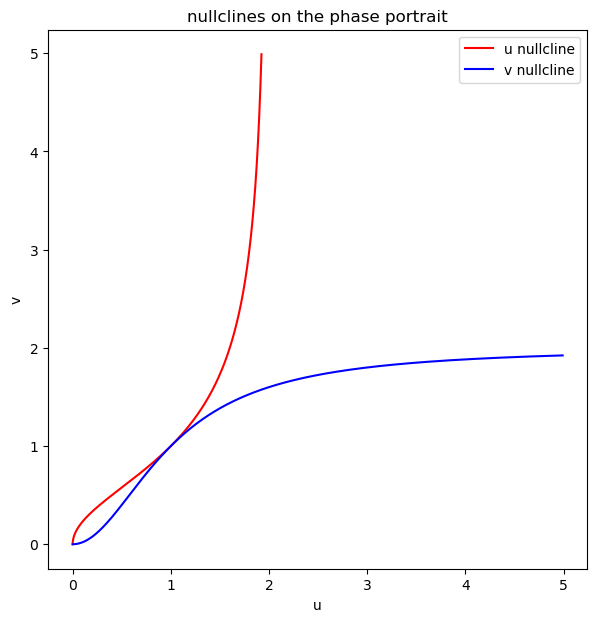

interactive(children=(FloatSlider(value=2.0, description='alpha1', max=5.0, step=0.01), FloatSlider(value=2.0,…

<function __main__.f(alpha1, alpha2)>

In [2]:
# play with the alphas
def f(alpha1, alpha2):
    v1=np.arange(0,5,0.01)
    u1=alpha1*v1**2/(v1**2+1)
    u2=np.arange(0,5,0.01)
    v2=alpha2*u2**2/(u2**2+1)
    plt.figure(figsize=(7,7))
    plt.plot(u1,v1,'r', label='u nullcline')
    plt.plot(u2,v2,'b', label='v nullcline')
    plt.legend()
    plt.axis('scaled')
    plt.xlabel('u')
    plt.ylabel('v')
    plt.title('nullclines on the phase portrait')
    plt.show()
    
interact(f, alpha1 = (0,5,0.01), alpha2 = (0,5,0.01))

**We will now determine when the system is bistable (two stable fixed points). Combine the two nullclines (elimination of $v$) to get a function $f(u)$ of a single variable such that fixed points correspond to the zeros of this function: $f(u^*)=0$. First look at the symmetric case when $\alpha_{1}=\alpha_{2}$ (so $u^*=v^*$).**

**9) How many fixed points does the system have for different $\alpha$?**

**10) Do you think it is also possible to find the zeros analytically for the non-symmetric case?**

> 9) In the symmetric case, you can find the limit value of $\alpha$ so that the two nullclines cross each other 3 times by setting $u=v, \alpha_{1}=\alpha_{2}=\alpha$: $u=\alpha\left(\frac{u^2}{u^2 +1}\right) \rightarrow u(u^2 - \alpha u + 1)=0$. 

> 10) In the asymmetric case, you can obtain a function $f(u)$ of a single variable by substituting $v$ into $u$ and solving for $u$. $u=\frac{\alpha_{1}v^{2}}{v^{2} + 1}, v^{2} =\left(\frac{\alpha_{2}u^{2}}{u^{2}+1}\right)^{2} \rightarrow (\alpha_{2}^{2} +1)u^{5} - (\alpha_{1}\alpha_{2}^2)u^4 + 2u^3 + u=0$. It is however very impractical to solve a general 4th degree order polynomial (there is one trivial solution in our fifth order polynomial: $u^*=0$ so then we'd "only" need to solve the fourth order polynomyal), see https://en.wikipedia.org/wiki/Quartic_function, section Solution.

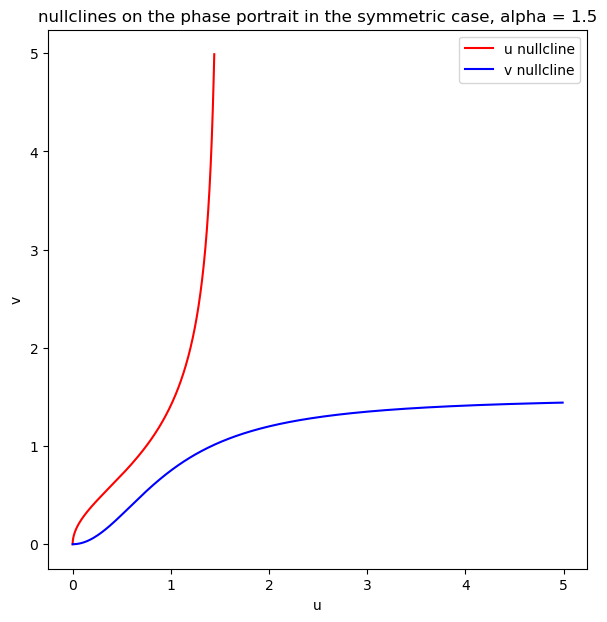

In [3]:
# nullclines for alpha=1.5

alpha=1.5

alpha1=alpha
alpha2=alpha

v1=np.arange(0,5,0.01)
u1=alpha1*v1**2/(v1**2+1)

u2=np.arange(0,5,0.01)
v2=alpha2*u2**2/(u2**2+1)

plt.figure(figsize=(7,7))
plt.plot(u1,v1,'r', label='u nullcline')
plt.plot(u2,v2,'b', label='v nullcline')
plt.legend()
plt.axis('scaled')
plt.xlabel('u')
plt.ylabel('v')
plt.title('nullclines on the phase portrait in the symmetric case, alpha = 1.5')
plt.show()

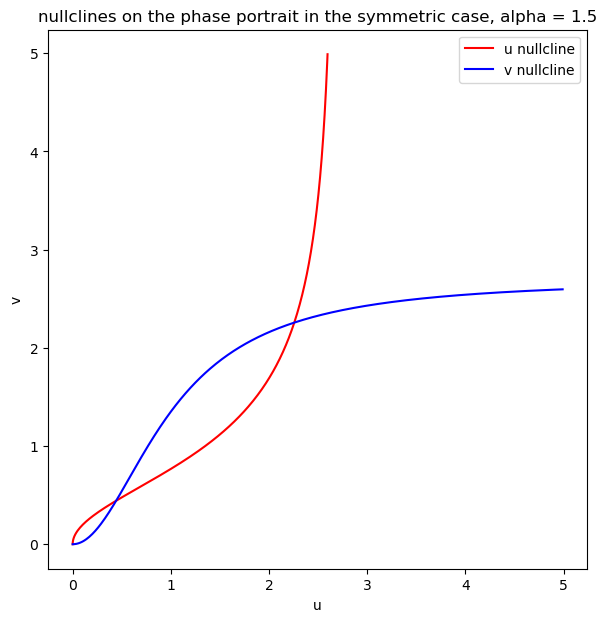

In [4]:
# nullclines for alpha=2.7

alpha=2.7 # plug here other values you may want to explore and see how the qualitative behavior changes

alpha1=alpha
alpha2=alpha

v1=np.arange(0,5,0.01)
u1=alpha1*v1**2/(v1**2+1)

u2=np.arange(0,5,0.01)
v2=alpha2*u2**2/(u2**2+1)

plt.figure(figsize=(7,7))
plt.plot(u1,v1,'r', label='u nullcline')
plt.plot(u2,v2,'b', label='v nullcline')
plt.legend()
plt.axis('scaled')
plt.xlabel('u')
plt.ylabel('v')
plt.title('nullclines on the phase portrait in the symmetric case, alpha = 1.5')
plt.show()

**11) Compute the stability of the fixed points for the symmetric case, for different values of $\alpha$, both $\alpha_{1}=\alpha_{2} >2$ and $\alpha_{1}=\alpha_{2} <2$**

> 11) For example:
				When $\alpha_1=\alpha_2=1.5$, there is only one stable fixed point at $x_{1}^{*}=(0,0)$.
				When $\alpha_1=\alpha_2=3$, there are 3 fixed points: $x_{1}^{*}=(0,0), x_{2}^{*}=(0.38,0.38)$ and $x_{3}^{*}=(2.62,2.62)$. In this case, the system is bistable since $x_{1}^{*}$ and $x_{3}^{*}$ are stable. The $x_{2}^{*}$  is a saddle fixed point : $\tau = -2<0,\Delta = -2.05<0$ and $\tau^{2} -4\Delta >0$. The $x_{3}^{*}$ fixed point is stable : $\tau = -2<0,\Delta = 0.94>0$ and $\tau^{2} -4\Delta >0$.

**12) Study the phase portrait for Model 2 in the two symmetric cases $\alpha_{1}=\alpha_{2} >2$ and $\alpha_{1}=\alpha_{2} <2$**

In [5]:
# define our system of differential equations

def model2(s,t, alpha):
    u,v=s
    u_dot=alpha*v**2/(v**2+1)-u
    v_dot=alpha*u**2/(u**2+1)-v
    return u_dot, v_dot

In [6]:
# initial conditions and time step

l_X0 = []
for x in [0,5]:
    for y in np.linspace(0,5,5,endpoint = True):
        l_X0.append((x,y))
for y in [0,5]:
    for x in np.linspace(0,5,5,endpoint = True):
        l_X0.append((x,y))        

t_init = 0
t_final = 10
n_steps = t_final*20
dt = t_final / n_steps
t = np.linspace(t_init, t_final, n_steps)

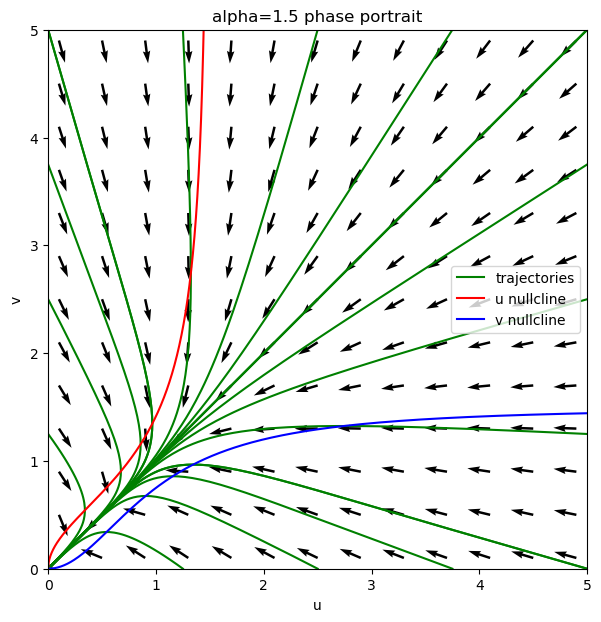

In [7]:
# case alpha=1.5
# nullclines

alpha=1.5
alpha1=alpha
alpha2=alpha
v1=np.arange(0,5,0.01)
u1=alpha1*v1**2/(v1**2+1)
u2=np.arange(0,5,0.01)
v2=alpha2*u2**2/(u2**2+1)

# vector field
uq=np.arange(0.1,5.1,0.4)
up, vp=np.meshgrid(uq,uq)
du, dv= model2([up, vp],t,alpha)
du, dv=du/np.sqrt(du**2+dv**2), dv/np.sqrt(du**2+dv**2)

# trajectories
plt.figure(figsize=(7,7))
for X0 in l_X0:
    sol = odeint(model2, X0, t, args=(alpha,))
    plt.plot(sol[:,0],sol[:,1],'g')
    
plt.plot(sol[:,0],sol[:,1],'g',label='trajectories' )
plt.plot(u1,v1,'r', label='u nullcline')
plt.plot(u2,v2,'b', label='v nullcline')
plt.quiver(up,vp,du,dv)
plt.axis('scaled')
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('u')
plt.ylabel('v')
plt.title('alpha=1.5 phase portrait')
plt.legend()
plt.show()


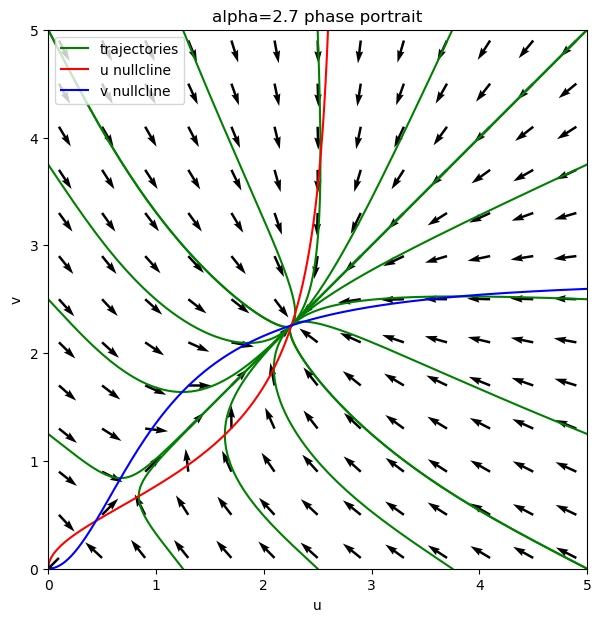

In [9]:
# case alpha=2.7
# nullclines

alpha=2.7
alpha1=alpha
alpha2=alpha
v1=np.arange(0,5,0.01)
u1=alpha1*v1**2/(v1**2+1)
u2=np.arange(0,5,0.01)
v2=alpha2*u2**2/(u2**2+1)

# vector field
uq=np.arange(0.1,5.1,0.4)
up, vp=np.meshgrid(uq,uq)
du, dv= model2([up, vp],t,alpha)
du, dv=du/np.sqrt(du**2+dv**2+0.000001), dv/np.sqrt(du**2+dv**2+0.000001)

# trajectories
plt.figure(figsize=(7,7))
for X0 in l_X0:
    sol = odeint(model2, X0, t, args=(alpha,))
    plt.plot(sol[:,0],sol[:,1],'g')
    
plt.plot(sol[:,0],sol[:,1],'g',label='trajectories' )
plt.plot(u1,v1,'r', label='u nullcline')
plt.plot(u2,v2,'b', label='v nullcline')
plt.quiver(up,vp,du,dv)
plt.axis('scaled')
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('u')
plt.ylabel('v')
plt.title('alpha=2.7 phase portrait')
plt.legend()
plt.show()


You could also try out the libraries ipywidgets or bokeh to interact with plots, eg, showing how the plot changes as you change alpha. Maybe ask ChatGPT for help!